In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

[6]


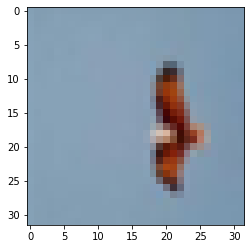

In [5]:
i = 1009
plt.imshow(X_train[i])
print(y_test[i])

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


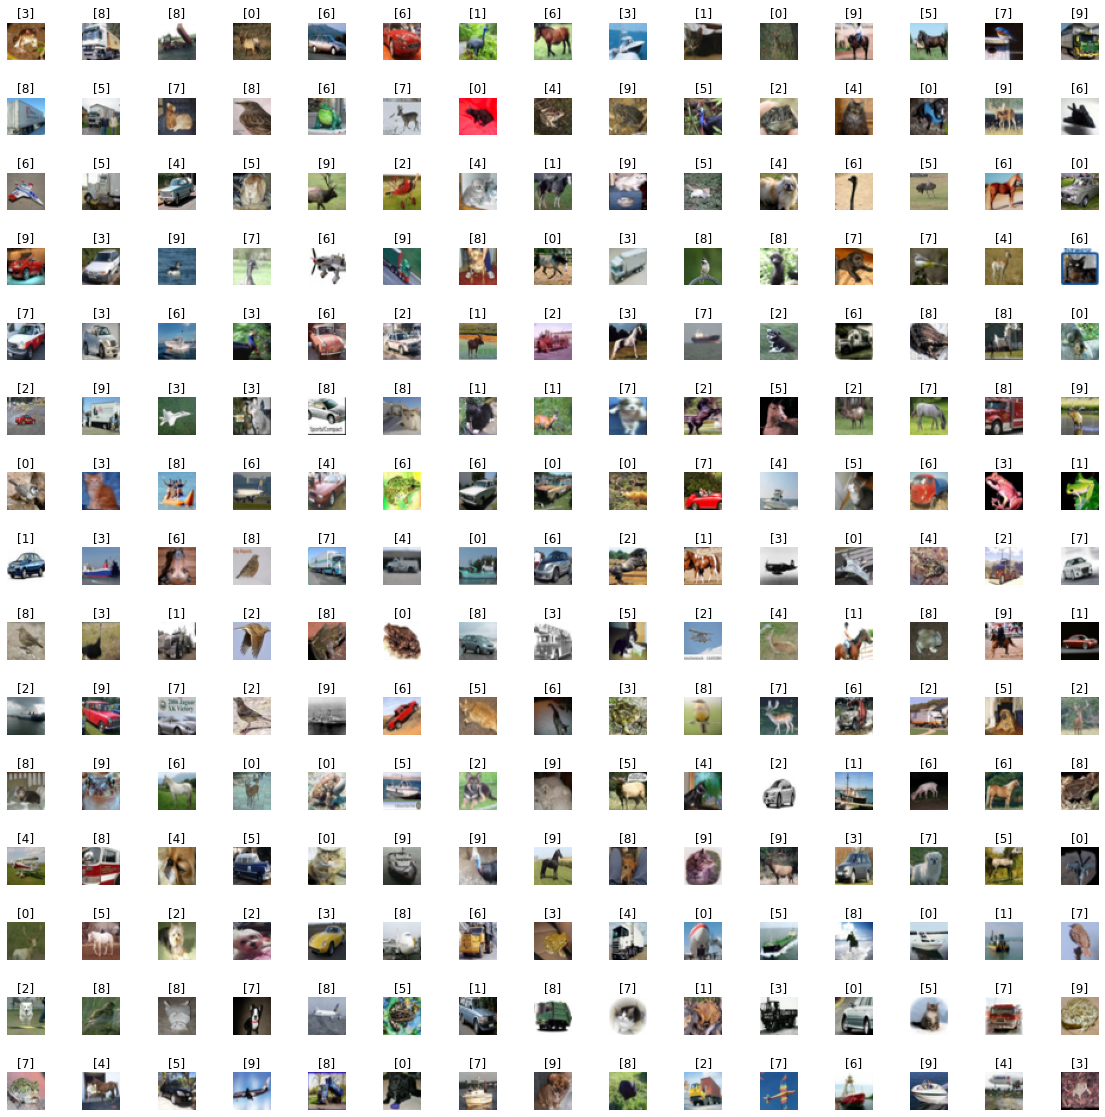

In [7]:
n_training = 1000

L_grid=15
W_grid=15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(20,20))

axes=axes.ravel()

index=np.random.randint(0, len(X_train))

for i in range(0,W_grid*L_grid):
    axes[i].imshow(X_train[i])
    axes[i].set_title(y_test[i])
    axes[i].axis('off')

plt.subplots_adjust(hspace=1)
    

In [8]:
x_train.shape

NameError: name 'x_train' is not defined

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
number_cat = 10

In [8]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
Input = X_train.shape[1:]

In [17]:
Input

(32, 32, 3)

In [18]:
#1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#2
X_train = X_train/255
X_test = X_test/255
#3
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

#4
import keras
Input = X_train.shape[1:]



NameError: name 'keras' is not defined

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [11]:
import keras
y_test = keras.utils.to_categorical(y_test, number_cat)

In [19]:
y_test.shape

(10000, 1)

In [20]:
y_train.shape

(50000, 1)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, Dense
from keras.optimizers import adam
from keras.callbacks import TensorBoard 

models = Sequential()
models.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=Input))
models.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
models.add(MaxPool2D(2,2))
models.add(Dropout(0.3))

models.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
models.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
models.add(MaxPool2D(2,2))
models.add(Dropout(0.3))

models.add(Flatten())

models.add(Dense(units=1024, activation='relu'))
models.add(Dense(units=1024, activation='relu'))
models.add(Dense(units=10, activation='softmax'))

           
           

In [13]:
models.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics=['accuracy'])


In [14]:
history = models.fit(X_train,y_train,epochs=1,batch_size=10, shuffle=True)

Epoch 1/1
50000/50000 [==============================] - 242s 5ms/step - loss: 1.6427 - accuracy: 0.4120


In [15]:
import os

directory = os.path.join(os.getcwd(), 'saved_model')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
models.save(model_path)


In [25]:
import os
dir= os.path.join(os.getcwd(), 'fire_model')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir,'fire_name')
models.save(model_path)

In [26]:
import keras
from keras.datasets import cifar10

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [28]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [29]:
X_train = X_train/255
X_test = X_test/255

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(rotation_range=90)
data_gen.fit(X_train)

In [19]:
n = 8
X_train_sample =  X_train[:n]



In [33]:
X_train_sample.shape

(8, 32, 32, 3)

In [20]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train_sample)

In [21]:
datagen = ImageDataGenerator(
    rotation_range = 90,
    width_shift_range=0.1,
    horizontal_flip = True,
    vertical_flip = True
)

In [ ]:
datagen.fit(X_train)

In [23]:
models.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 136s 87ms/step - loss: 1.7981 - accuracy: 0.3445
Epoch 2/2
1563/1563 [==============================] - 131s 84ms/step - loss: 1.6876 - accuracy: 0.3901


In [24]:
score = models.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 492us/step


In [27]:
import os
dir = os.path.join(os.getcwd(), 'cifar10_imagedatagenerator')
if not os.path.isdir(dir):
    os.makedirs(dir)
image = os.path.join(dir, 'imagegene')
models.save(image)